# Plot the Graph for the total number of issues with different labels created and closed on every date on GitHub for SPM587SP19 issues project

### Example of Issue Form Filled out

### Data Set File:  SPM587SP19issues.json

In [3]:
import os

#import cPickle as pickle

import pandas as pd                                    # panda's nickname is pd

import numpy as np                                     # numpy as np

from pandas import DataFrame, Series                   # for convenience

import matplotlib.pyplot as plt

%matplotlib inline



# Requirement : Get the total number of issues with different labels for every date and plot them in a stacked chart

In [1]:
# Read the JSON file into a list of dictionaries

import json
list_of_issues_dict_data = [json.loads(line) for line in open('SPM587SP19issues.json')]

In [4]:
# Create the DataFrame object for the list_of_issues_dict_data object

issues_df = DataFrame(list_of_issues_dict_data)

In [5]:
# Sanity test: print first 10 rows in our DataFrame

issues_df
    

Author   State   closed_at  created_at  issue_number  \
0    SSP19SCM782    open        None  2019-04-17           464   
1    SSP19SCM782    open        None  2019-04-17           463   
2    SSP19SCM781    open        None  2019-04-17           462   
3    SSP19SCM781    open        None  2019-04-17           461   
4    SSP19SCM781    open        None  2019-04-17           460   
5    DSP19SCM782    open        None  2019-04-17           459   
6    DSP19SCM782    open        None  2019-04-17           458   
7    DSP19SCM782    open        None  2019-04-17           457   
8    DSP19SCM781    open        None  2019-04-17           456   
9    DSP19SCM781    open        None  2019-04-17           455   
10   SSP19SCM782    open        None  2019-04-16           454   
11   SSP19SCM782    open        None  2019-04-16           453   
12   SSP19SCM781    open        None  2019-04-16           452   
13   SSP19SCM781    open        None  2019-04-16           451   
14   SSP19SCM781    open        None  2019-04-16           450   
15   DSP19SCM782    open        None  2019-04-16           449   
16   DSP19SCM782    open        None  2019-04-16           448   
17   DSP19SCM782    open        None  2019-04-16           447   
18   DSP19SCM781    open        None  2019-04-16           446   
19   DSP19SCM781    open        None  2019-04-16           445   
20   TSP19SCM781    open        None  2019-04-15           444   
21   TSP19SCM781    open        None  2019-04-15           443   
22   TSP19SCM782    open        None  2019-04-15           442   
23   TSP19SCM782    open        None  2019-04-15           441   
24   TSP19SCM782    open        None  2019-04-15           440   
25   RSP19SCM782    open        None  2019-04-15           439   
26   RSP19SCM782    open        None  2019-04-15           438   
27   RSP19SCM782    open        None  2019-04-15           437   
28   RSP19SCM781    open        None  2019-04-15           436   
29   RSP19SCM781  closed  2019-04-17  2019-04-15           435   
..           ...     ...         ...         ...           ...   
302   SPM587SP19  closed  2019-04-03  2019-03-31            31   
303   SPM587SP19  closed  2019-04-02  2019-03-31            30   
304   SPM587SP19  closed  2019-04-07  2019-03-31            29   
305   SPM587SP19  closed  2019-04-02  2019-03-31            28   
306   SPM587SP19  closed  2019-04-03  2019-03-31            27   
307   SPM587SP19  closed  2019-03-31  2019-03-31            26   
308   SPM587SP19  closed  2019-03-31  2019-03-31            25   
309   SPM587SP19  closed  2019-03-31  2019-03-31            24   
310   SPM587SP19  closed  2019-03-31  2019-03-31            23   
311   SPM587SP19  closed  2019-03-31  2019-03-31            22   
312   SPM587SP19  closed  2019-03-31  2019-03-31            21   
313   SPM587SP19  closed  2019-03-31  2019-03-31            20   
314   SPM587SP19  closed  2019-03-31  2019-03-31            19   
315   SPM587SP19  closed  2019-03-31  2019-03-31            18   
316   SPM587SP19  closed  2019-03-31  2019-03-31            17   
317   SPM587SP19  closed  2019-03-31  2019-03-31            16   
318   SPM587SP19  closed  2019-03-31  2019-03-31            15   
319   SPM587SP19  closed  2019-03-31  2019-03-31            14   
320   SPM587SP19  closed  2019-03-31  2019-03-30            13   
321   SPM587SP19  closed  2019-03-31  2019-03-30            12   
322   SPM587SP19  closed  2019-03-31  2019-03-30            11   
323   SPM587SP19  closed  2019-03-31  2019-03-30            10   
324   SPM587SP19  closed  2019-03-31  2019-03-30             9   
325   SPM587SP19  closed  2019-03-31  2019-03-30             8   
326   SPM587SP19  closed  2019-03-31  2019-03-30             7   
327   SPM587SP19  closed  2019-03-31  2019-03-30             6   
328   SPM587SP19  closed  2019-03-31  2019-03-30             5   
329   SPM587SP19  closed  2019-03-31  2019-03-29             4   
330   SPM587SP19  closed  2019-03-31  2019-03-29  

In [6]:
# Prepare and Clean the dataframe object

wrangled_issues_df = issues_df[['Author','State','closed_at','created_at','issue_number','labels']]
wrangled_issues_df.loc[0:len(wrangled_issues_df), 'OriginationPhase']= np.NaN
wrangled_issues_df.loc[0:len(wrangled_issues_df),'DetectionPhase']= np.NaN
wrangled_issues_df.loc[0:len(wrangled_issues_df),'Category']= np.NaN
wrangled_issues_df.loc[0:len(wrangled_issues_df),'Priority']= np.NaN
wrangled_issues_df.loc[0:len(wrangled_issues_df),'Status']= np.NaN


In [7]:
wrangled_issues_df

Author   State   closed_at  created_at  issue_number  \
0    SSP19SCM782    open        None  2019-04-17           464   
1    SSP19SCM782    open        None  2019-04-17           463   
2    SSP19SCM781    open        None  2019-04-17           462   
3    SSP19SCM781    open        None  2019-04-17           461   
4    SSP19SCM781    open        None  2019-04-17           460   
5    DSP19SCM782    open        None  2019-04-17           459   
6    DSP19SCM782    open        None  2019-04-17           458   
7    DSP19SCM782    open        None  2019-04-17           457   
8    DSP19SCM781    open        None  2019-04-17           456   
9    DSP19SCM781    open        None  2019-04-17           455   
10   SSP19SCM782    open        None  2019-04-16           454   
11   SSP19SCM782    open        None  2019-04-16           453   
12   SSP19SCM781    open        None  2019-04-16           452   
13   SSP19SCM781    open        None  2019-04-16           451   
14   SSP19SCM781    open        None  2019-04-16           450   
15   DSP19SCM782    open        None  2019-04-16           449   
16   DSP19SCM782    open        None  2019-04-16           448   
17   DSP19SCM782    open        None  2019-04-16           447   
18   DSP19SCM781    open        None  2019-04-16           446   
19   DSP19SCM781    open        None  2019-04-16           445   
20   TSP19SCM781    open        None  2019-04-15           444   
21   TSP19SCM781    open        None  2019-04-15           443   
22   TSP19SCM782    open        None  2019-04-15           442   
23   TSP19SCM782    open        None  2019-04-15           441   
24   TSP19SCM782    open        None  2019-04-15           440   
25   RSP19SCM782    open        None  2019-04-15           439   
26   RSP19SCM782    open        None  2019-04-15           438   
27   RSP19SCM782    open        None  2019-04-15           437   
28   RSP19SCM781    open        None  2019-04-15           436   
29   RSP19SCM781  closed  2019-04-17  2019-04-15           435   
..           ...     ...         ...         ...           ...   
302   SPM587SP19  closed  2019-04-03  2019-03-31            31   
303   SPM587SP19  closed  2019-04-02  2019-03-31            30   
304   SPM587SP19  closed  2019-04-07  2019-03-31            29   
305   SPM587SP19  closed  2019-04-02  2019-03-31            28   
306   SPM587SP19  closed  2019-04-03  2019-03-31            27   
307   SPM587SP19  closed  2019-03-31  2019-03-31            26   
308   SPM587SP19  closed  2019-03-31  2019-03-31            25   
309   SPM587SP19  closed  2019-03-31  2019-03-31            24   
310   SPM587SP19  closed  2019-03-31  2019-03-31            23   
311   SPM587SP19  closed  2019-03-31  2019-03-31            22   
312   SPM587SP19  closed  2019-03-31  2019-03-31            21   
313   SPM587SP19  closed  2019-03-31  2019-03-31            20   
314   SPM587SP19  closed  2019-03-31  2019-03-31            19   
315   SPM587SP19  closed  2019-03-31  2019-03-31            18   
316   SPM587SP19  closed  2019-03-31  2019-03-31            17   
317   SPM587SP19  closed  2019-03-31  2019-03-31            16   
318   SPM587SP19  closed  2019-03-31  2019-03-31            15   
319   SPM587SP19  closed  2019-03-31  2019-03-31            14   
320   SPM587SP19  closed  2019-03-31  2019-03-30            13   
321   SPM587SP19  closed  2019-03-31  2019-03-30            12   
322   SPM587SP19  closed  2019-03-31  2019-03-30            11   
323   SPM587SP19  closed  2019-03-31  2019-03-30            10   
324   SPM587SP19  closed  2019-03-31  2019-03-30             9   
325   SPM587SP19  closed  2019-03-31  2019-03-30             8   
326   SPM587SP19  closed  2019-03-31  2019-03-30             7   
327   SPM587SP19  closed  2019-03-31  2019-03-30             6   
328   SPM587SP19  closed  2019-03-31  2019-03-30             5   
329   SPM587SP19  closed  2019-03-31  2019-03-29             4   
330   SPM587SP19  closed  2019-03-31  2019-03-29  

In [8]:
for i in range(0, len(wrangled_issues_df)):
   if wrangled_issues_df.iloc[i]['labels']:
        for label in wrangled_issues_df.iloc[i]['labels']:
            label_name= (label.split(':'))[0]
            label_value= (label.split(':'))[1]
            wrangled_issues_df.loc[i, label_name]=label_value
 

In [19]:
wrangled_issues_df

Author   State   closed_at  created_at  issue_number  \
0   SPM587SP19    open        None  2019-03-31            51   
1   SPM587SP19    open        None  2019-03-31            50   
2   SPM587SP19    open        None  2019-03-31            49   
3   SPM587SP19    open        None  2019-03-31            48   
4   SPM587SP19    open        None  2019-03-31            47   
5   SPM587SP19    open        None  2019-03-31            46   
6   SPM587SP19    open        None  2019-03-31            45   
7   SPM587SP19    open        None  2019-03-31            44   
8   SPM587SP19    open        None  2019-03-31            43   
9   SPM587SP19    open        None  2019-03-31            42   
10  SPM587SP19    open        None  2019-03-31            41   
11  SPM587SP19    open        None  2019-03-31            40   
12  SPM587SP19    open        None  2019-03-31            39   
13  SPM587SP19    open        None  2019-03-31            38   
14  SPM587SP19    open        None  2019-03-31            37   
15  SPM587SP19    open        None  2019-03-31            36   
16  SPM587SP19    open        None  2019-03-31            35   
17  SPM587SP19    open        None  2019-03-31            34   
18  SPM587SP19    open        None  2019-03-31            33   
19  SPM587SP19    open        None  2019-03-31            32   
20  SPM587SP19    open        None  2019-03-31            31   
21  SPM587SP19    open        None  2019-03-31            30   
22  SPM587SP19    open        None  2019-03-31            29   
23  SPM587SP19    open        None  2019-03-31            28   
24  SPM587SP19    open        None  2019-03-31            27   
25  SPM587SP19  closed  2019-03-31  2019-03-31            26   
26  SPM587SP19  closed  2019-03-31  2019-03-31            25   
27  SPM587SP19  closed  2019-03-31  2019-03-31            24   
28  SPM587SP19  closed  2019-03-31  2019-03-31            23   
29  SPM587SP19  closed  2019-03-31  2019-03-31            22   
30  SPM587SP19  closed  2019-03-31  2019-03-31            21   
31  SPM587SP19  closed  2019-03-31  2019-03-31            20   
32  SPM587SP19  closed  2019-03-31  2019-03-31            19   
33  SPM587SP19  closed  2019-03-31  2019-03-31            18   
34  SPM587SP19  closed  2019-03-31  2019-03-31            17   
35  SPM587SP19  closed  2019-03-31  2019-03-31            16   
36  SPM587SP19  closed  2019-03-31  2019-03-31            15   
37  SPM587SP19  closed  2019-03-31  2019-03-31            14   
38  SPM587SP19  closed  2019-03-31  2019-03-30            13   
39  SPM587SP19  closed  2019-03-31  2019-03-30            12   
40  SPM587SP19  closed  2019-03-31  2019-03-30            11   
41  SPM587SP19  closed  2019-03-31  2019-03-30            10   
42  SPM587SP19  closed  2019-03-31  2019-03-30             9   
43  SPM587SP19  closed  2019-03-31  2019-03-30             8   
44  SPM587SP19  closed  2019-03-31  2019-03-30             7   
45  SPM587SP19  closed  2019-03-31  2019-03-30             6   
46  SPM587SP19  closed  2019-03-31  2019-03-30             5   
47  SPM587SP19  closed  2019-03-31  2019-03-29             4   
48  SPM587SP19  closed  2019-03-31  2019-03-29             3   
49  SPM587SP19  closed  2019-03-31  2019-03-24             1   

                                               labels OriginationPhase  \
0   [Category:Bug, DetectionPhase:Design, Originat...     Requirements   
1   [Category:Enhancement, DetectionPhase:Coding, ...            Field   
2   [Category:Bug, DetectionPhase:Design, Originat...          Testing   
3   [Category:Bug, DetectionPhase:Coding, Originat...           Coding   
4   [Category:Inquiry, DetectionPhase:Design, Orig...          Testing   
5   [Category:Enhancement, DetectionPhase:Coding, ...     Requirements   
6   [Category:Inquiry, DetectionPhase:Coding, Orit...              NaN   
7   [Category:Bug, DetectionPhase:Coding, Originat...          Testing   
8   [Category:Bug, DetectionPhase:Field, Originati...    Documentation   
9  

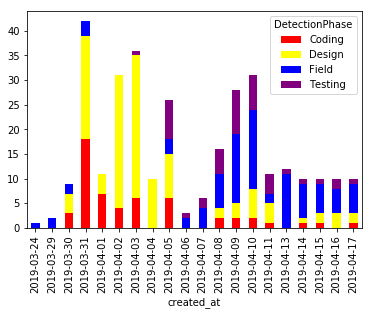

In [9]:
# Plot in Bar Chart the total number of issues created every day for every Detaction Phase

LabelsReviewedByDate = wrangled_issues_df.groupby(['created_at','DetectionPhase']).created_at.count()

dateLabelsFig = LabelsReviewedByDate.unstack().plot(kind='bar',stacked=True,  color=['red', 'yellow', 'blue', 'purple', 'green'], grid=False)

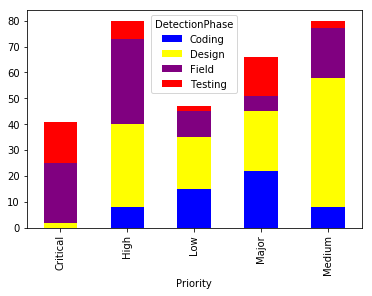

In [10]:
# Plot in Bar Chart the total number of issues created for every Phase based on thier priorites

LabelsReviewedByDate = wrangled_issues_df.groupby(['Priority','DetectionPhase']).created_at.count()

dateLabelsFig = LabelsReviewedByDate.unstack().plot(kind='bar',stacked=True,  color=['blue','yellow', 'purple', 'red', 'green'], grid=False)

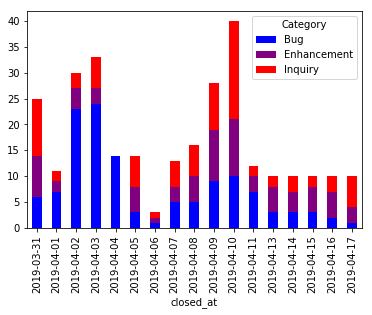

In [11]:
# Plot in Bar Chart the total number of issues closed every day for every Category

LabelsReviewedByDate = wrangled_issues_df.groupby(['closed_at','Category']).closed_at.count()

dateLabelsFig = LabelsReviewedByDate.unstack().plot(kind='bar',stacked=True,  color=['blue', 'purple', 'red', 'yellow', 'green'], grid=False)

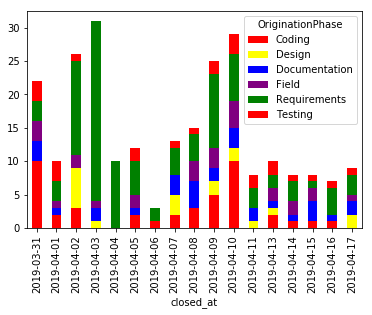

In [12]:
# Requirement #1: Plot in Bar Chart the total number of issues closed every day for every Origination Phase

LabelsReviewedByDate = wrangled_issues_df.groupby(['closed_at','OriginationPhase']).created_at.count()
dateLabelsFig = LabelsReviewedByDate.unstack().plot(kind='bar',stacked=True,  color=['red', 'yellow', 'blue', 'purple', 'green'], grid=False)

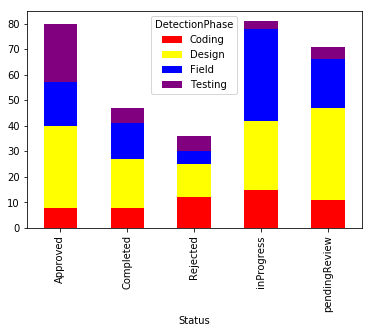

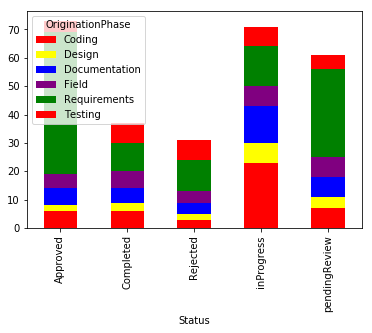

In [13]:
# Requirement #1: Plot in Bar Chart the total number of issues creaed_at every day for every Status
#Graph For Detection Phase
LabelsReviewedByDate = wrangled_issues_df.groupby(['Status','DetectionPhase']).created_at.count()
dateLabelsFig = LabelsReviewedByDate.unstack().plot(kind='bar',stacked=True,  color=['red', 'yellow', 'blue', 'purple', 'green'], grid=False)

#Graph For Origination Phase
LabelsReviewedByDate = wrangled_issues_df.groupby(['Status','OriginationPhase']).created_at.count()
dateLabelsFig = LabelsReviewedByDate.unstack().plot(kind='bar',stacked=True,  color=['red', 'yellow', 'blue', 'purple', 'green'], grid=False)